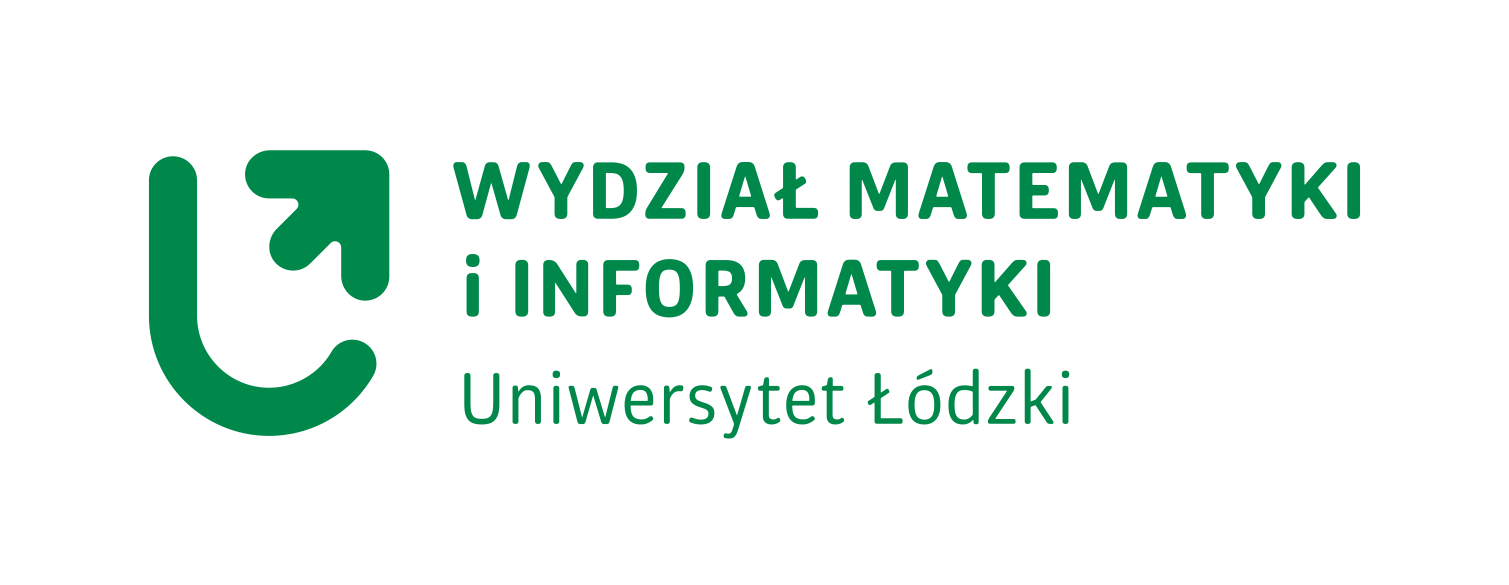

<center> Temat ćwiczenia: </center>
<center> Konwolucyjna sieć neuronowa </center>

Sprawozdanie z przedmiotu: **Zaawansowane Metody Eksploracji**
<br>Studia stacjonarne 2-go stopnia
<br>Kierunek: *Analiza danych, sem. 2*
<br>Prowadzący: *prof. dr hab. inż. Grzegorz Dudek*
<br> Data wykonania ćwiczenia: 15.05.2024, 22.05.2024
<br>Data złożenia sprawozdania 28.05.2024
<br> Wykonała: Kinga Lubecka
<br> Nr sekcji: **1.14**



#**A)Cel ćwiczenia**
Zapoznanie się z tematem konwulacyjnych sieci neuronowych. Klasyfikacja własnych próbek pisma na wcześniej wytrenowanym modelu z dobranymi hiperparametrami.

#**B)Treść zadania**
1. Zaimportuj niezbędne moduły i ustaw ziarno generatora liczb pseudolosowych:
tf.random.set_seed(nr_gr), gdzie nr_gr to numer Twojej sekcji.
2. Wczytaj dane (datasets.mnist.load_data()). Znormalizuj dane do przedziału [0, 1]. Pokaż
przykładowe obrazy cyfr.
3. Zbuduj model sieci CNN z jedną warstwą konwolucyjną. Skompiluj model. Przeprowadź uczenie modelu.
Eksperymentalnie dobierz hiperparametry zapewniające najmniejszy błąd klasyfikacji (estymowany na
zbiorze walidacyjnym). Przedstaw wyniki kilku wariantów
4. Dla najlepszego modelu z p. 3 pokaż krzywe zbieżności oraz confusion matrix dla zbioru testowego
5. Wyznacz klasy przygotowanych wcześniej próbek własnego pisma. Pokaż obrazki cyfr oraz odpowiedzi sieci
w postaci wykresów słupkowych.

#**C) Opis używaniej w ćwiczeniu sieci neuronowej**
Konwolucyjna sieć neuronowa (CNN), to wyspecjalizowany typ algorytmu głębokiego uczenia się, zaprojektowany głównie do zadań wymagających rozpoznawania obiektów, w tym klasyfikacji, wykrywania i segmentacji obrazu.

Architektura cnn wykorzystuje specjalną technikę zwaną splotem, zamiast polegać wyłącznie na mnożeniu macierzy, jak w przypadku tradycyjnych sieci neuronowych. Sieci splotowe wykorzystują splot, który w matematyce jest operacją  na dwóch funkcjach, w wyniku której powstaje trzecia funkcja, która wyraża, w jaki sposób kształt jednej jest modyfikowany przez drugą. Rolą sieci splotowych jest redukcja obrazów do postaci łatwiejszej do przetworzenia, bez utraty cech kluczowych dla uzyskania dobrej prognozy.

*Warstwa wejściowa (Input Layer)*- jest to warstwa wejściowa, która reprezentuje obraz wejściowy do sieci. Warto zwrócić uwagę na rodzaj obrazu. W przypadku kolorowych zdjęć używa się trzech kanałów wejściowych RGB, odpowiadającym odpowiednio kanałom czerwonym, zielonym i niebieskim. W przypadku gdy mamy skalę szarości wówczas mamy jeden kanał. Obraz RGB to matryca wartości pikseli.Liczba parametrów w warstwie CNN zależy od wielkości pól recepcyjnych (jąder filtrów) i liczby filtrów. Każdy neuron w warstwie CNN otrzymuje dane wejściowe z lokalnego obszaru poprzedniej warstwy, zwanego jego polem recepcyjnym. Pola recepcyjne przesuwają się po wejściu, obliczając iloczyny skalarne i tworząc na wyjściu splotową mapę cech, która zazwyczaj przechodzi przez funkcję aktywacji rektyfikowanej jednostki liniowej (ReLU).
Splotowe sieci neuronowe składają się z wielu warstw sztucznych neuronów.

*Sztuczne neurony*, to funkcje matematyczne, które obliczają ważoną sumę wielu danych wejściowych i wyprowadzają wartość aktywacji. Kiedy wprowadzany jest obraz do CNN, każda warstwa generuje kilka funkcji aktywacyjnych, które są przekazywane do następnej warstwy w celu wyodrębnienia cech.

*Pierwsza warstwa* zwykle wyodrębnia podstawowe cechy, takie jak poziome lub ukośne krawędzie. Dane wyjściowe są przekazywane do następnej warstwy, która wykrywa bardziej złożone elementy, takie jak narożniki lub krawędzie kombinowane. W miarę zagłębiania się w sieć może ona identyfikować jeszcze bardziej złożone cechy, takie jak obiekty, twarze itp.

Podobnie jak warstwa splotowa, warstwa łączenia jest odpowiedzialna za zmniejszenie rozmiaru przestrzennego obiektu splecionego. Ma to na celu zmniejszenie mocy obliczeniowej wymaganej do przetwarzania danych poprzez zmniejszenie wymiarów. Zatem w *Max Pooling* znajdujemy maksymalną wartość piksela z części obrazu objętej jądrem.

*Rozmiar jądra*, często nazywany również rozmiarem filtra, odnosi się do wymiarów przesuwanego okna nad wejściem. Wybór tego hiperparametru ma ogromny wpływ na zadanie klasyfikacji obrazu. Na przykład małe jądra są w stanie wydobyć z danych wejściowych znacznie większą ilość informacji zawierających wysoce lokalne funkcje. Mniejszy rozmiar jądra prowadzi również do mniejszego zmniejszenia wymiarów warstw, co pozwala na głębszą architekturę.I odwrotnie, duży rozmiar jądra wyodrębnia mniej informacji, co prowadzi do szybszego zmniejszenia wymiarów warstw, czego skutkiem często jest gorsza wydajność.

*Padding* definiuje sposób obsługi obramowania próbki. Umożliwia to otrzymanie rozmiaru wyjścia takiego samego jak rozmiar wejścia (przy założeniu, że strides jest przesunięciem o jeden). Osiąga się to kosztem dodania dodatkowych (sztucznych) wag na krawędziach (najczęściej z wartością zero).

Parametr *stride* wskazuje, o ile pikseli jądro powinno zostać przesunięte na raz. Czyli inaczej mówiąc, oznacza krok przesunięcia okna filtra. Najczęściej używa się kroku wynoszącego 1 dla warstw splotowych. Oznacza to, że ​​iloczyn skalarny jest wykonywany w oknie wejściowym np. 3×3 w celu uzyskania wartości wyjściowej, a następnie jest przesuwany o jeden piksel dla każdej kolejnej operacji.

Jednym z powodów, dla których sieci neuronowe są w stanie osiągnąć tak olbrzymią dokładność, jest ich nieliniowość. Nieliniowość jest niezbędna do wytworzenia nieliniowych granic decyzyjnych, tak aby wynik nie mógł być zapisany jako liniowa kombinacja danych wejściowych. Gdyby nie było nieliniowej *funkcji aktywacji*, głębokie sieci CNN przekształciłyby się w pojedynczą, równoważną warstwę splotową, która nie działałaby tak dobrze. Przykładem takiej funkcji jest aktywator ReLU.

Celem Poolingu jest stopniowe zmniejszanie rozmiaru obrazu, co zmniejsza liczbę parametrów do wytrenowania. Skraca więc czas działania sieci, upraszcza  model i w niektórych przypadkach pomaga walczyć z przeuczeniem (overfitingiem) sieci.
Idea poolingu polega na tym, że kilka pikseli np. rozmiar 2×2 mapujemy na 1 piksel. Najbardziej znane są dwa rodzaje poolingów:
* max (maximum) – gdy bierzemy maksymalną wartość z 4 pikseli,
* avg (avarage) – gdy bierzemy średnią wartość z 4 pikseli.

*Flatten Layer (warstwa spłaszczająca)*- ta warstwa przekształca wielowymiarową warstwę w sieci w jednowymiarowy wektor. Robione jest to po to, aby dopasować dane wejściowe w pełni połączonej warstwy do klasyfikacji. Na przykład tensor o wielkości 10x10x3 zostałby przekształcony w wektor o rozmiarze 300 (1 x 300).Zadaniem poprzedzających warstw splotowych sieci było wyodrębnienie cechy z obrazu wejściowego. Aby sklasyfikować cechy często wykorzystywana jest funkcja, która wymaga jednowymiarowych danych wejściowych do tego konieczne jest spłaszczenie danych.


#**D) Metodyka rozwiązania**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Zad1

Zaimportowanie potrzebnych bibliotek.

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import cv2
from tensorflow.keras.callbacks import EarlyStopping

#Zad2

Wczytanie danych.

In [ ]:
tf.random.set_seed(1.14)
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Normalizacja wartości pikseli, tak by zawierały się w przedziale [0, 1].

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Pokazanie przykładowych dwunastu obrazów cyfr.

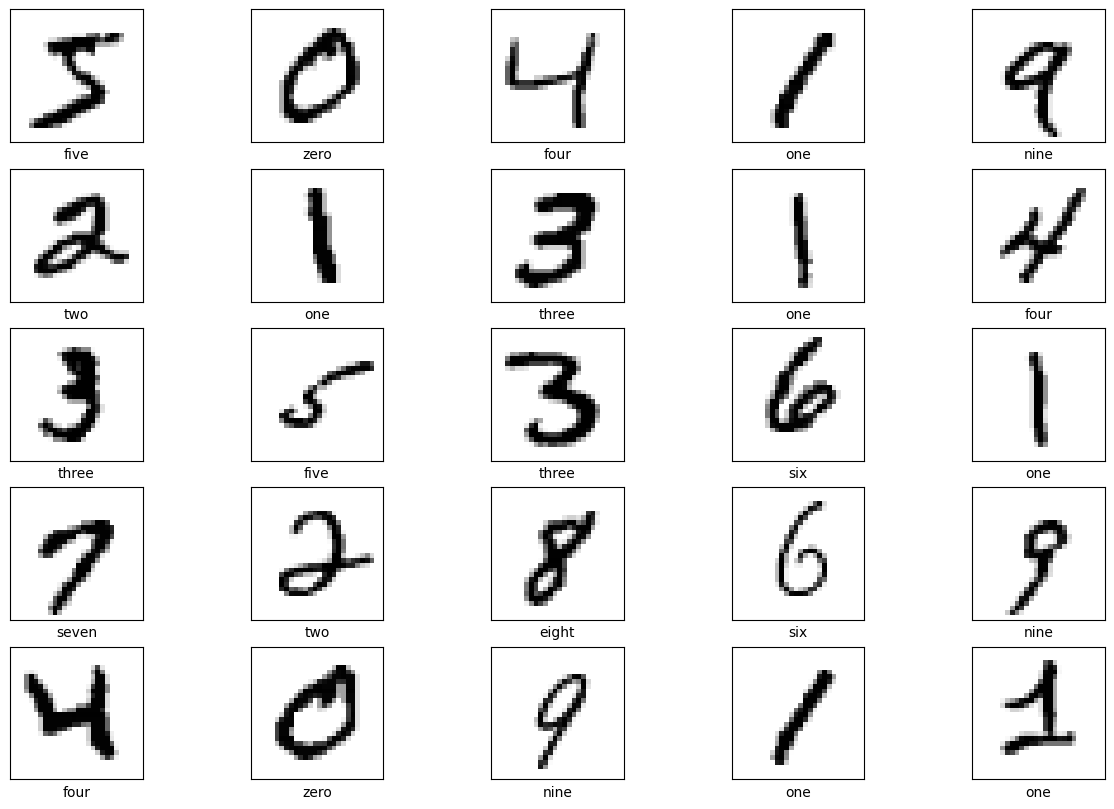

In [ ]:
class_names = ['zero','one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']

plt.figure(figsize=(15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


#Zad3

Model sieci z jedną warstwą konwolucyjną. Opis modelu:
- dodanie jednej warstwy konwolucyjnej z 32 filtrami(jądrami), każdy z nich o rozmiarze 3x3 z funkcją aktywacji ReLU. Kształt obrazów to 28x28 pikseli z jednym kanałem (czarno- białe).
- dodanie warstwy maksymalnego pooling, która zmniejsza wymiary przestrzenne (wysokość i szerokość) danych wejściowych przez pobieranie maksymalnej wartości w każdej podmacierzy o wymiarach 2x2.
- layers.Flatten(): Spłaszcza dane wejściowe, przekształcając je z formatu 2D (macierze) do formatu 1D (wektory). Spłaszczenie przygotowuje dane do przetwarzania przez w pełni połączoną (gęstą) warstwę.
- dodanie w pełni połączonej gęstej
 warstwy z 64 jednostkami (neuronami) i funkcją aktywacji ReLU. W pełni połączone warstwy łączą każdy neuron z każdą jednostką w poprzedniej warstwie.
- dodanie warstwy wyjściowej z 10 jednostkami (neuronami), bez określonej funkcji aktywacji. Liczba jednostek odpowiada liczbie klas w problemie klasyfikacji (w przypadku MNIST, są to cyfry od 0 do 9, czyli 10 klas).

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                346176    
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

Kompilacja modelu. Optymalizator Adam automatycznie dostosowuje współczynniki uczenia dla każdego parametru. Funkcja straty Sparse Categorical Crossentropy jest używana w problemach klasyfikacji wieloklasowej, gdzie etykiety są w postaci liczb całkowitych. Funkcja ta porównuje prawdopodobieństwa wyjściowe modelu z prawdziwymi etykietami i oblicza stratę, która ma być minimalizowana podczas treningu. Kiedy from_logits jest ustawione na True, funkcja straty automatycznie stosuje funkcję softmax do wyjść modelu przed obliczeniem straty. Accuracy: metryka, która będzie używana do oceny skuteczności modelu.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



Trenowanie modelu.

Train_images to zbiór obrazów treningowych(dane wejściowe), train_labels to zbiór etykiet treningowych (dane wyjściowe). Liczba epok oznacza, ile razy cały zbiór treningowy zostanie przekazany przez sieć. Batch_size  odpowiada za zdefiniowanie ile rekordów (obserwacji) przechodzi na raz podczas pojedynczego przebiegu zanim nastąpi pierwsza aktualizacja wag parametrów,

In [ ]:
history = model.fit(train_images, train_labels, epochs=20,
batch_size=100,
validation_split=0.2)

Epoch 1/20
480/480 [==============================] - 27s 54ms/step - loss: 0.2660 - accuracy: 0.9236 - val_loss: 0.1052 - val_accuracy: 0.9719
Epoch 2/20
480/480 [==============================] - 22s 45ms/step - loss: 0.0865 - accuracy: 0.9749 - val_loss: 0.0851 - val_accuracy: 0.9759
Epoch 3/20
480/480 [==============================] - 22s 47ms/step - loss: 0.0588 - accuracy: 0.9820 - val_loss: 0.0661 - val_accuracy: 0.9800
Epoch 4/20
480/480 [==============================] - 23s 49ms/step - loss: 0.0439 - accuracy: 0.9867 - val_loss: 0.0553 - val_accuracy: 0.9847
Epoch 5/20
480/480 [==============================] - 22s 45ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0550 - val_accuracy: 0.9844
Epoch 6/20
480/480 [==============================] - 24s 49ms/step - loss: 0.0255 - accuracy: 0.9922 - val_loss: 0.0535 - val_accuracy: 0.9850
Epoch 7/20
480/480 [==============================] - 22s 45ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0606 - val_accuracy:

Ten model wydaje się być przeuczony, gdyż od pewnego momentu strata walidacyjna zaczyna rosnąć, wówczas gdy strata treningowa wciąż maleje.

In [ ]:
history3= model.fit(train_images, train_labels, epochs=4,
batch_size=90,
validation_split=0.2)

Epoch 1/4
534/534 [==============================] - 23s 41ms/step - loss: 0.2449 - accuracy: 0.9288 - val_loss: 0.0959 - val_accuracy: 0.9744
Epoch 2/4
534/534 [==============================] - 22s 41ms/step - loss: 0.0779 - accuracy: 0.9765 - val_loss: 0.0744 - val_accuracy: 0.9784
Epoch 3/4
534/534 [==============================] - 29s 55ms/step - loss: 0.0549 - accuracy: 0.9835 - val_loss: 0.0649 - val_accuracy: 0.9804
Epoch 4/4
534/534 [==============================] - 22s 40ms/step - loss: 0.0411 - accuracy: 0.9879 - val_loss: 0.0532 - val_accuracy: 0.9838


In [ ]:
history4= model.fit(train_images, train_labels, epochs=10,
batch_size=60,
validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 27s 32ms/step - loss: 0.2205 - accuracy: 0.9363 - val_loss: 0.0959 - val_accuracy: 0.9728
Epoch 2/10
800/800 [==============================] - 22s 27ms/step - loss: 0.0708 - accuracy: 0.9794 - val_loss: 0.0670 - val_accuracy: 0.9797
Epoch 3/10
800/800 [==============================] - 25s 31ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0553 - val_accuracy: 0.9843
Epoch 4/10
800/800 [==============================] - 23s 28ms/step - loss: 0.0339 - accuracy: 0.9899 - val_loss: 0.0477 - val_accuracy: 0.9854
Epoch 5/10
800/800 [==============================] - 26s 33ms/step - loss: 0.0262 - accuracy: 0.9919 - val_loss: 0.0583 - val_accuracy: 0.9823
Epoch 6/10
800/800 [==============================] - 23s 28ms/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.0506 - val_accuracy: 0.9860
Epoch 7/10
800/800 [==============================] - 24s 30ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0543 - val_accuracy:

  Monitor= val_loss oznacza, że monitorowana będzie wartość straty walidacyjnej (val_loss). Walidacyjna strata to miara tego, jak dobrze model radzi sobie na zestawie danych walidacyjnych, które nie są wykorzystywane do trenowania modelu.

  Patience=5 oznacza, że trenowanie zostanie przerwane, jeśli strata walidacyjna nie poprawi się przez 5 kolejnych epok.
  
  Restore_best_weights=True oznacza, że po zatrzymaniu trenowania, model przywróci wagi, które osiągnęły najlepszy wynik walidacyjny (najniższą stratę walidacyjną) w trakcie trenowania.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history6= model.fit(train_images, train_labels, epochs=20,
batch_size=64,
validation_split=0.1,
callbacks=[early_stopping])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


844/844 [==============================] - 29s 33ms/step - loss: 0.2312 - accuracy: 0.9330 - val_loss: 0.0752 - val_accuracy: 0.9800
Epoch 2/20
844/844 [==============================] - 27s 32ms/step - loss: 0.0763 - accuracy: 0.9771 - val_loss: 0.0585 - val_accuracy: 0.9847
Epoch 3/20
844/844 [==============================] - 23s 27ms/step - loss: 0.0532 - accuracy: 0.9840 - val_loss: 0.0545 - val_accuracy: 0.9858
Epoch 4/20
844/844 [==============================] - 25s 30ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0471 - val_accuracy: 0.9880
Epoch 5/20
844/844 [==============================] - 24s 28ms/step - loss: 0.0313 - accuracy: 0.9906 - val_loss: 0.0537 - val_accuracy: 0.9853
Epoch 6/20
844/844 [==============================] - 26s 31ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0518 - val_accuracy: 0.9870
Epoch 7/20
844/844 [==============================] - 25s 29ms/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0488 - val_accuracy: 0.9877
Epo

Najmniejszy błąd klasyfikacji, oznacza, że została osiągnięta najwyższa dokładność precyzji. W modelu z następującymi hiperparametrami: 9 epokami i batch_size = 64 występują najlepsze dokładności. Jednocześnie wzrasta dokładność na zbiorze treningowym oraz walidacyjnym, co oznacza że model poprawia swoją zdolność do przewidywania poprawnych klas zarówno na danych treningowych oraz nowych danych.

#Zad 4

313/313 - 3s - loss: 0.0418 - accuracy: 0.9860 - 3s/epoch - 11ms/step


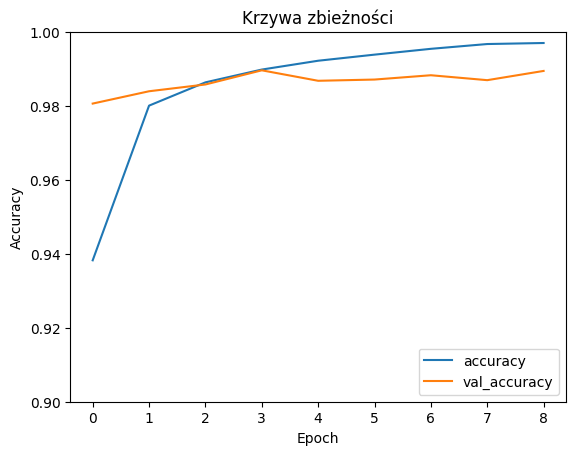

In [ ]:
plt.plot(history6.history['accuracy'], label='accuracy')
plt.plot(history6.history['val_accuracy'], label = 'val_accuracy')
plt.title('Krzywa zbieżności')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.90, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Zarówno dokładność treningowa jak i walidacyjna wzrastają w miarę upływu epok. Jest to porządany efekt i wskazuje na to, że model skutecznie uczy się rozpoznawać wzorce na danych treningowych. Również mała różnica między dokładnościami sugeruje, że nie występuje przeuczenie.

Prognozowanie na zbiorze testowym.

In [ ]:
test_predictions = model.predict(test_images)
test_pred_labels = np.argmax(test_predictions, axis=1)

313/313 [==============================] - 2s 5ms/step


Tworzenie macierzy pomyłek na podstawie prawdziwych etykiet (test_labels) i przewidywanych etykiet(test_pred_labels).

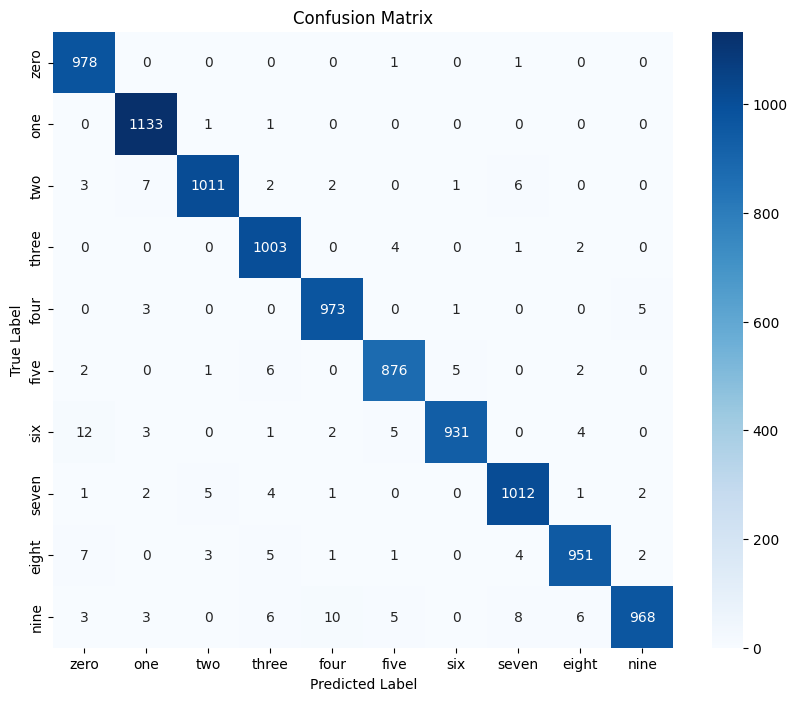

In [ ]:
conf_matrix = confusion_matrix(test_labels, test_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Macierz pomyłek pozwala na wizualizację wydajności modelu, pokazując ile razy poszczególne klasy były prawidłowo lub nieprawidłowo sklasyfikowane. Wiersze reprezentują rzeczywiste klasy, natomiast kolumny przewidywane klasy. Elementy na głównej przekątnej reprezentują poprawnie sklasyfikowane przypadki. W moim przypadku najwięcej poprawnie sklasyfikowanych zostało jedynek. Elementy poza główną przekątną to błędy klasyfikacji. Najwięcej źle sklasyfikowanych przypadków to dwanaście dla cyfry 0, w rzeczywistości będącej cyfrą 6.

#Zad5

Załadowanie próbek własnego pisma.

In [ ]:
c0 = cv2.imread('/content/drive/MyDrive/próbki2/13.png', 0)
c1 = cv2.imread('/content/drive/MyDrive/próbki2/12.png', 0)
c2 = cv2.imread('/content/drive/MyDrive/próbki2/3.png', 0)
c3 = cv2.imread('/content/drive/MyDrive/próbki2/5.png', 0)
c4 = cv2.imread('/content/drive/MyDrive/próbki2/14.png', 0)
c5 = cv2.imread('/content/drive/MyDrive/próbki2/7.png', 0)
c6 = cv2.imread('/content/drive/MyDrive/próbki2/8.png', 0)
c7 = cv2.imread('/content/drive/MyDrive/próbki2/9.png', 0)
c8 = cv2.imread('/content/drive/MyDrive/próbki2/10.png', 0)
c9= cv2.imread('/content/drive/MyDrive/próbki2/2.png', 0)

Normalizacja do zakresu [0,1].

In [ ]:
c0_test = 1 - c0 / 255.0
c1_test = 1 - c1 / 255.0
c2_test = 1 - c2 / 255.0
c3_test = 1 - c3 / 255.0
c4_test = 1 - c4 / 255.0
c5_test = 1 - c5 / 255.0
c6_test = 1 - c6 / 255.0
c7_test = 1 - c7 / 255.0
c8_test = 1 - c8 / 255.0
c9_test = 1 - c9 / 255.0

Utworzenie macierzy obrazków.

In [ ]:
qw = np.empty([10,28,28])
qw[0]=c0_test
qw[1]=c1_test
qw[2]=c2_test
qw[3]=c3_test
qw[4]=c4_test
qw[5]=c5_test
qw[6]=c6_test
qw[7]=c7_test
qw[8]=c8_test
qw[9]=c9_test

Wyświetlenie obrazków.

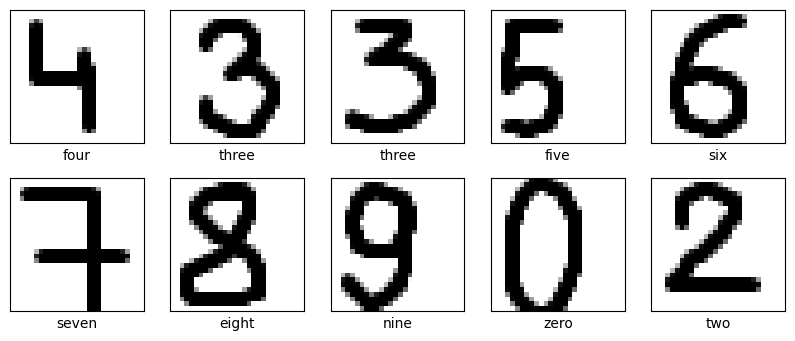

In [ ]:
class_names = ['zero','one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']
train_labels = [4,3,3,5,6,7,8,9,0,2]

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(qw[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Pzzewidywanie klas dla nowych danych (własnych próbek) za pomocą wytrenowanego modelu.

In [ ]:
numbers_predictions = model.predict(qw)
numbers_pred_labels = np.argmax(numbers_predictions, axis=1)

1/1 [==============================] - 0s 87ms/step


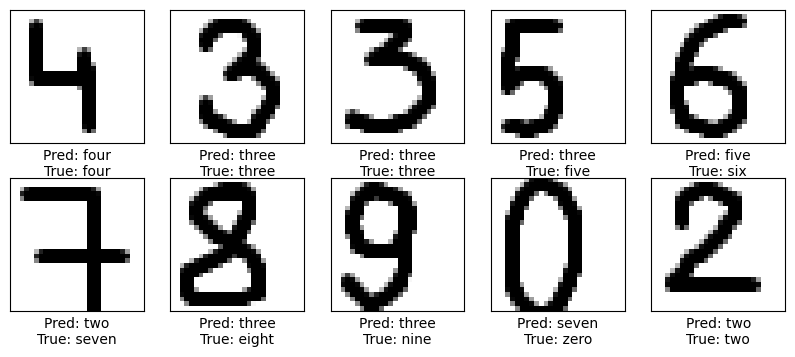

In [ ]:
class_names = ['zero','one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']
train_labels = [4,3,3,5,6,7,8,9,0,2]
plt.figure(figsize = (10,4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(qw[i].squeeze(), cmap = plt.cm.binary)
  plt.xlabel(f"Pred: {class_names[numbers_pred_labels[i]]}\nTrue: {class_names[train_labels[i]]}")
  #plt.xlabel(numbers_pred_labels[i])
plt.show()

Model poprawnie sklasyfikował 4 próbki. Można zauważyć, że wszędzie gdzie zauważył "brzuszki" przypisał cyfrę 3. Była to najczęstsza pomyłka.

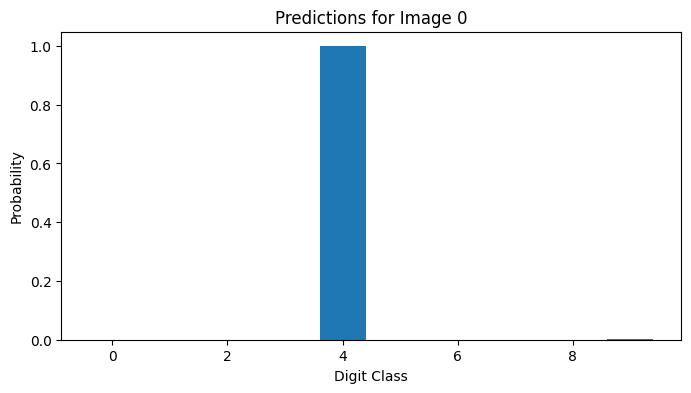

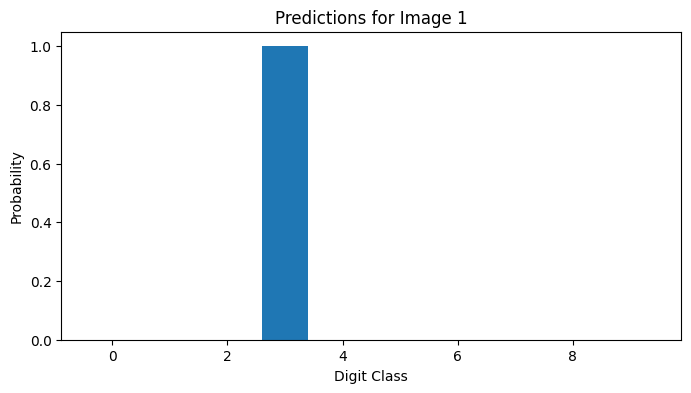

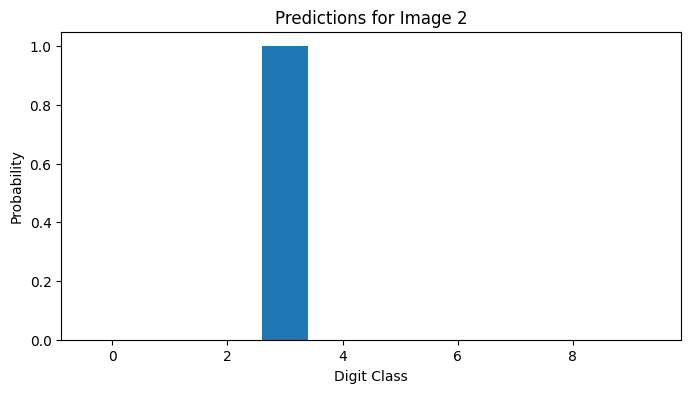

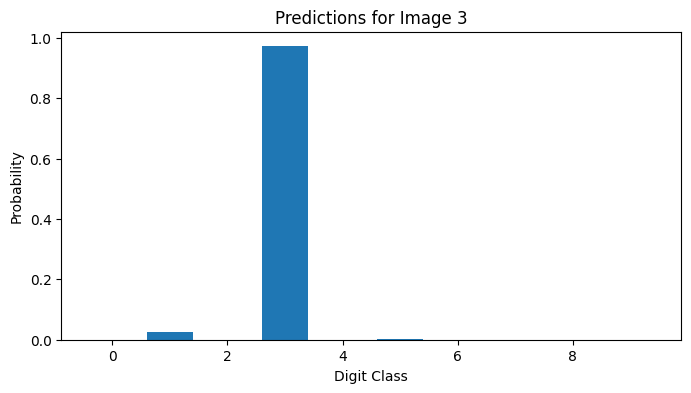

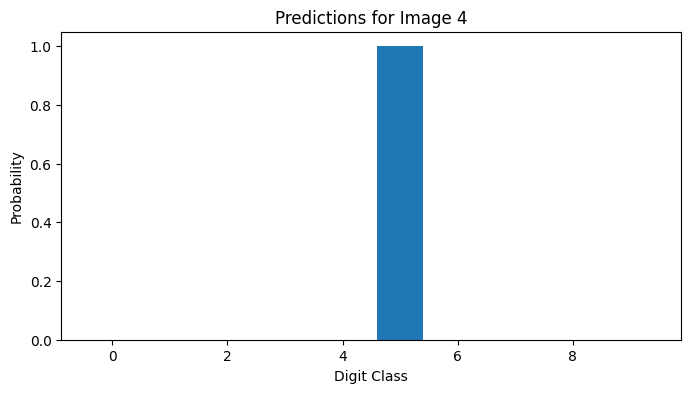

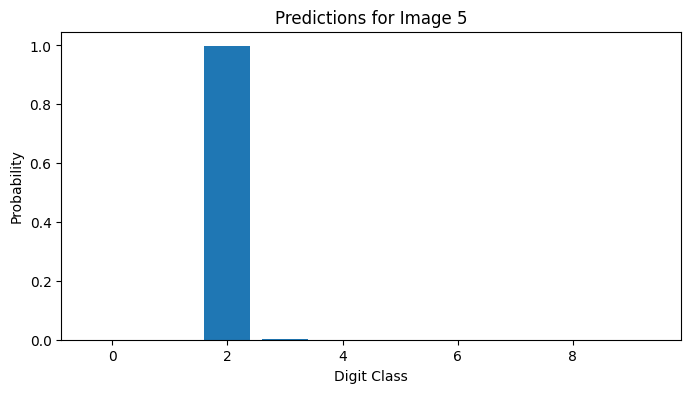

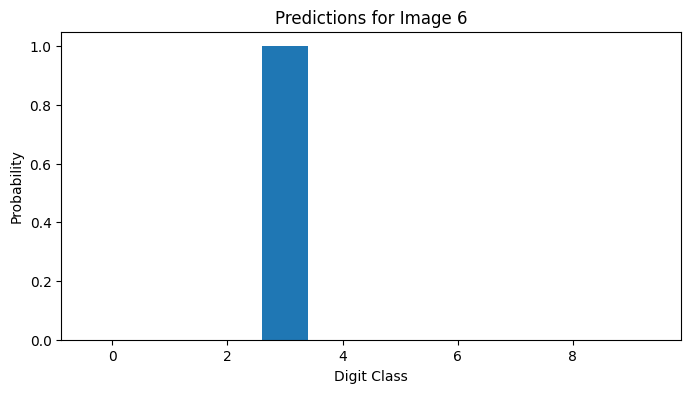

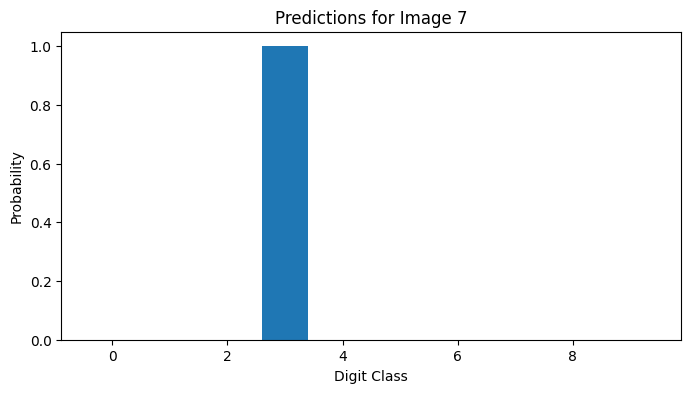

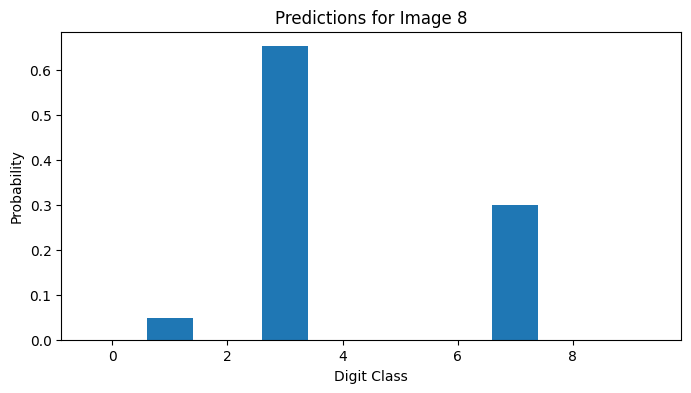

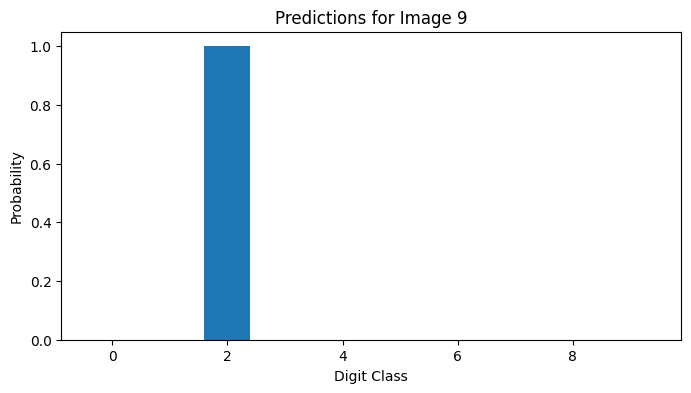

In [ ]:
for i in range(10):
    plt.figure(figsize=(8, 4))
    plt.bar(range(10), numbers_predictions[i])
    plt.xlabel('Digit Class')
    plt.ylabel('Probability')
    plt.title(f'Predictions for Image {i}')
    plt.show()

Ten kod tworzy wykresy słupkowe. Słupki reprezentują prawdopodobieństwa przewidywanych klas cyfr dla kolejnych obrazków. dla przypomnienia cyfry po kolei są następujące: 4,3,3,5,6,7,8,9,0,2.
Zatem np. dla zera prawdopodobieństwo na przewidzenie zera jest równe 0. Największe szanse są na zakwalifikowanie zera jako 3.  
Cyfrę 9 oraz 8 zakwalifuje jako 3 w 100%.  
Cyfrę 7 kwalifikuje do klasy cyfry 2, jednakże tutaj również mała szansa istnieje na uzyskanie cyfry 3.  
Dla cyfr 3 oraz 4 nie ma pomyłek, prawdopodobieństwo zakwalifikowania poprawnie jest równe 1.


# **E) Wnioski końcowe**

Konwulacyjna sieć neuronowa to bardzo potężne narzędzie służące w głównej mierze do rozpoznawania obrazów. Ma szerokie zastosowania, np w:
* w obrazowaniu medycznym(stacje CNN mogą analizować tysiące raportów patologicznych, aby wizualnie wykryć obecność lub brak komórek nowotworowych na obrazach).
* w przetwarzaniu dźwięku: Wykrywanie słów kluczowych można wykorzystać na dowolnym urządzeniu wyposażonym w mikrofon w celu wykrycia wymówienia określonego słowa lub frazy („Hej Siri!”). CNN mogą dokładnie poznać i wykryć słowo kluczowe, ignorując wszystkie inne frazy, niezależnie od środowiska.
* Wykrywanie obiektów: Zautomatyzowana jazda opiera się na CNN, które dokładnie wykrywają obecność znaku lub innego obiektu i podejmują decyzje na podstawie wyników.

Mimo, że w moim zadaniu użyłam tylko jednej warstwy konwolucyjnej rozpoznała kilka wyróżniających się cech. Z pewnością, gdyby wykorzystać więcej warstw, wyniki byłyby bardziej zadawalające, gdyż model nauczyłby się jeszcze lepiej odróżniać cyfry na podstawie większej ilości cech i treningu.